## The Ishigami function

In this example we are going to quantify the correlation between the input variables and the output variable of a model thanks to the *Sobol'* indices.

The *Sobol'* indices allow to evaluate the importance of a single variable or a specific set of variables. 

*Sobol'* indices range is $\left[0; 1\right]$ ; the more the indice value is close to 1 the more the variable is important toward the output variance of the function. The *Sobol'* indices can be computed at different orders.

The first order indices evaluate the importance of one variable at a time ($d$ indices, with $d$ the input dimension of the model). The $d$ total indices give the relative importance of every variables except the variable $x_i$, for every variable.

Here the *Sobol'* indices are estimated on an analytical function: *Ishigami*. It writes

$$ F(\mathbf{x}) = \sin(x_1)+7\sin(x_2)^2+0.1x_3^4\sin(x_1), \quad \mathbf{x}\in [-\pi, \pi]^3 $$
Analytical values of *Sobol'* indices for this function are available:

\begin{align}
    S_{1, 2, 3} &= [0.314, 0.442, 0.], \\
    S_{T_{1, 2, 3}} &= [0.558, 0.442, 0.244].
\end{align}

This function is interesting because it exhibits an interaction between $x_1$ and $x_3$ although $x_3$ by itself do not play a role at first order.

In [1]:
import openturns as ot

ot.RandomGenerator.SetSeed(0)

# Create the model and input distribution
formula = ['sin(X1)+7*sin(X2)^2+0.1*X3^4*sin(X1)']
input_names = ['X1', 'X2', 'X3']
dimension = 3
corners = [[-np.pi] * dimension, [np.pi] * dimension]
model = ot.SymbolicFunction(input_names, formula)
distribution = ot.ComposedDistribution([ot.Uniform(corners[0][i], corners[1][i])
                                        for i in range(dimension)])

## Density-based measures

In the following, we assume that we already have some samples and that we cannot generate new ones.

In [2]:
import numpy as np
from otsensitivity import cusunoro, moment_independent, plot_indices

In [3]:
# We have the following sample and cannot generate anything else
size = 1000
sample = ot.LowDiscrepancyExperiment(ot.SobolSequence(),
                                     distribution, size).generate()
data = model(sample)

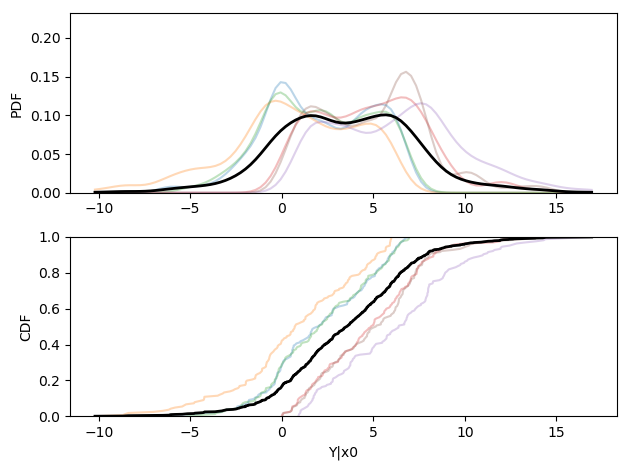

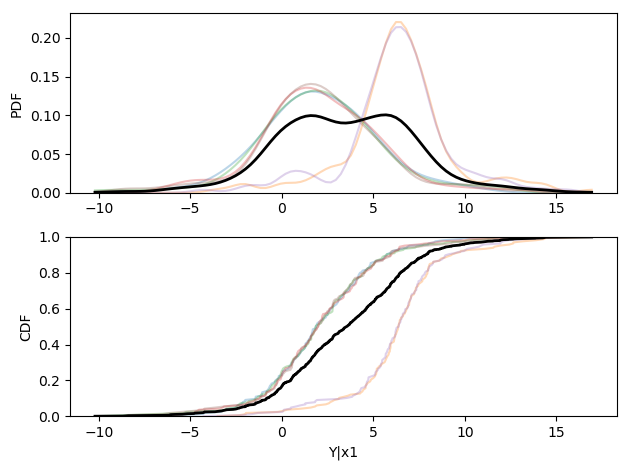

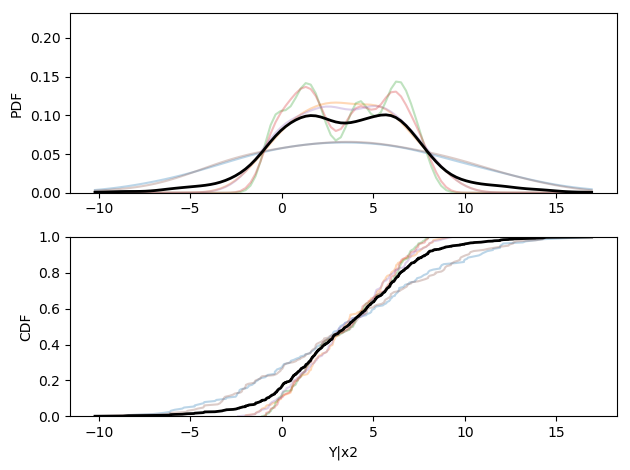

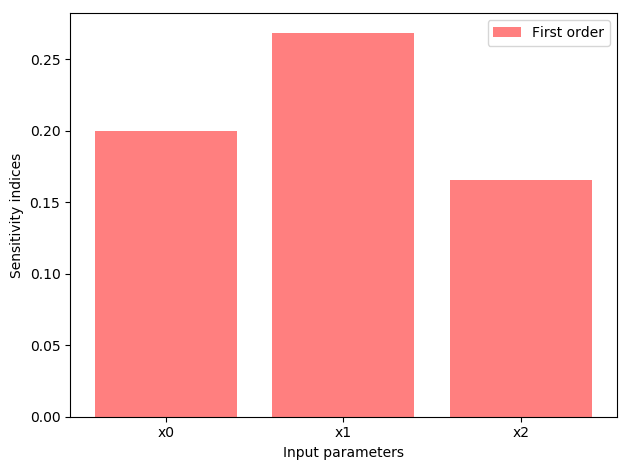

([<Figure size 640x480 with 1 Axes>],
 [<matplotlib.axes._subplots.AxesSubplot at 0x1236e6710>])

In [4]:
# Compute delta indices using moment independent method

momi = moment_independent(sample, data)
delta = momi[2]['Delta']
plot_indices([delta])

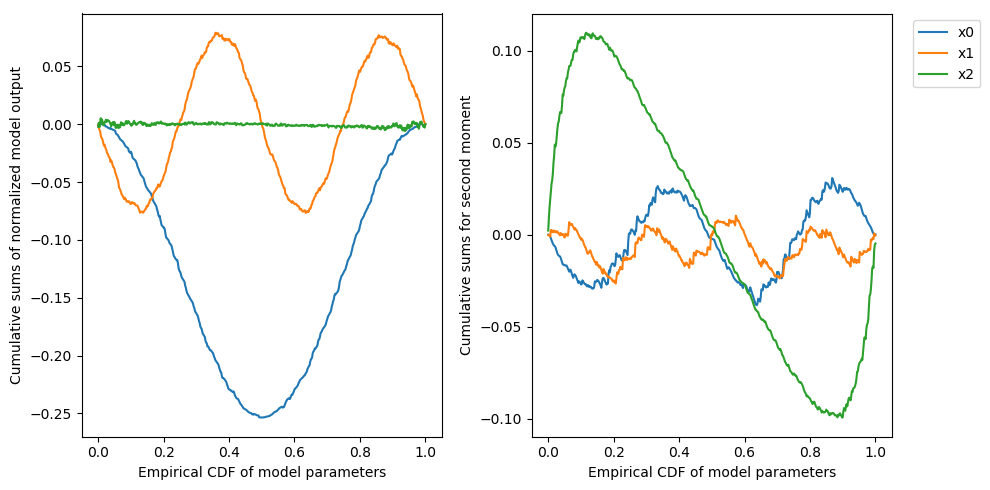

(<Figure size 1000x500 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x123bcd9e8>,
       dtype=object),
 array([0.32597789, 0.44848289, 0.00440988]))

In [5]:
cusunoro(sample, data)